In [1]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\.gitignore
.\house_price.ipynb
.\README.md
.\.git\config
.\.git\description
.\.git\FETCH_HEAD
.\.git\HEAD
.\.git\index
.\.git\ORIG_HEAD
.\.git\hooks\applypatch-msg.sample
.\.git\hooks\commit-msg.sample
.\.git\hooks\fsmonitor-watchman.sample
.\.git\hooks\post-update.sample
.\.git\hooks\pre-applypatch.sample
.\.git\hooks\pre-commit.sample
.\.git\hooks\pre-push.sample
.\.git\hooks\pre-rebase.sample
.\.git\hooks\pre-receive.sample
.\.git\hooks\prepare-commit-msg.sample
.\.git\hooks\update.sample
.\.git\info\exclude
.\.git\logs\HEAD
.\.git\logs\refs\heads\master
.\.git\logs\refs\remotes\origin\main
.\.git\logs\refs\remotes\origin\master
.\.git\objects\74\6619970052d954c573f4ad477856398cd165b0
.\.git\objects\c2\66eecd3087a2c35434f930cf2b9d90d725a450
.\.git\objects\ed\999c04faf57f00d09aac30e09b42bcc0d449d2
.\.git\refs\heads\master
.\.git\refs\remotes\origin\main
.\.git\refs\remotes\origin\master
.\.ipynb_checkpoints\house_price-checkpoint.ipynb
.\kaggle_data\house-prices-advanced-regression

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [6]:
train_path = "./kaggle_data/house-prices-advanced-regression-techniques/train.csv"
test_path = "./kaggle_data/house-prices-advanced-regression-techniques/test.csv"
sample_path = "./kaggle_data/house-prices-advanced-regression-techniques/sample_submission.csv"

In [7]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample = pd.read_csv(sample_path)

In [8]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [13]:
train.isnull().sum()/len(train)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [14]:
test.isnull().sum()/len(test)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.068540
TotRmsAbvGrd      0.000000
Functional        0.137080
F

In [19]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [20]:
! pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://mirrors.aliyun.com/pypi/simple, https://pypi.douban.com/simple


DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


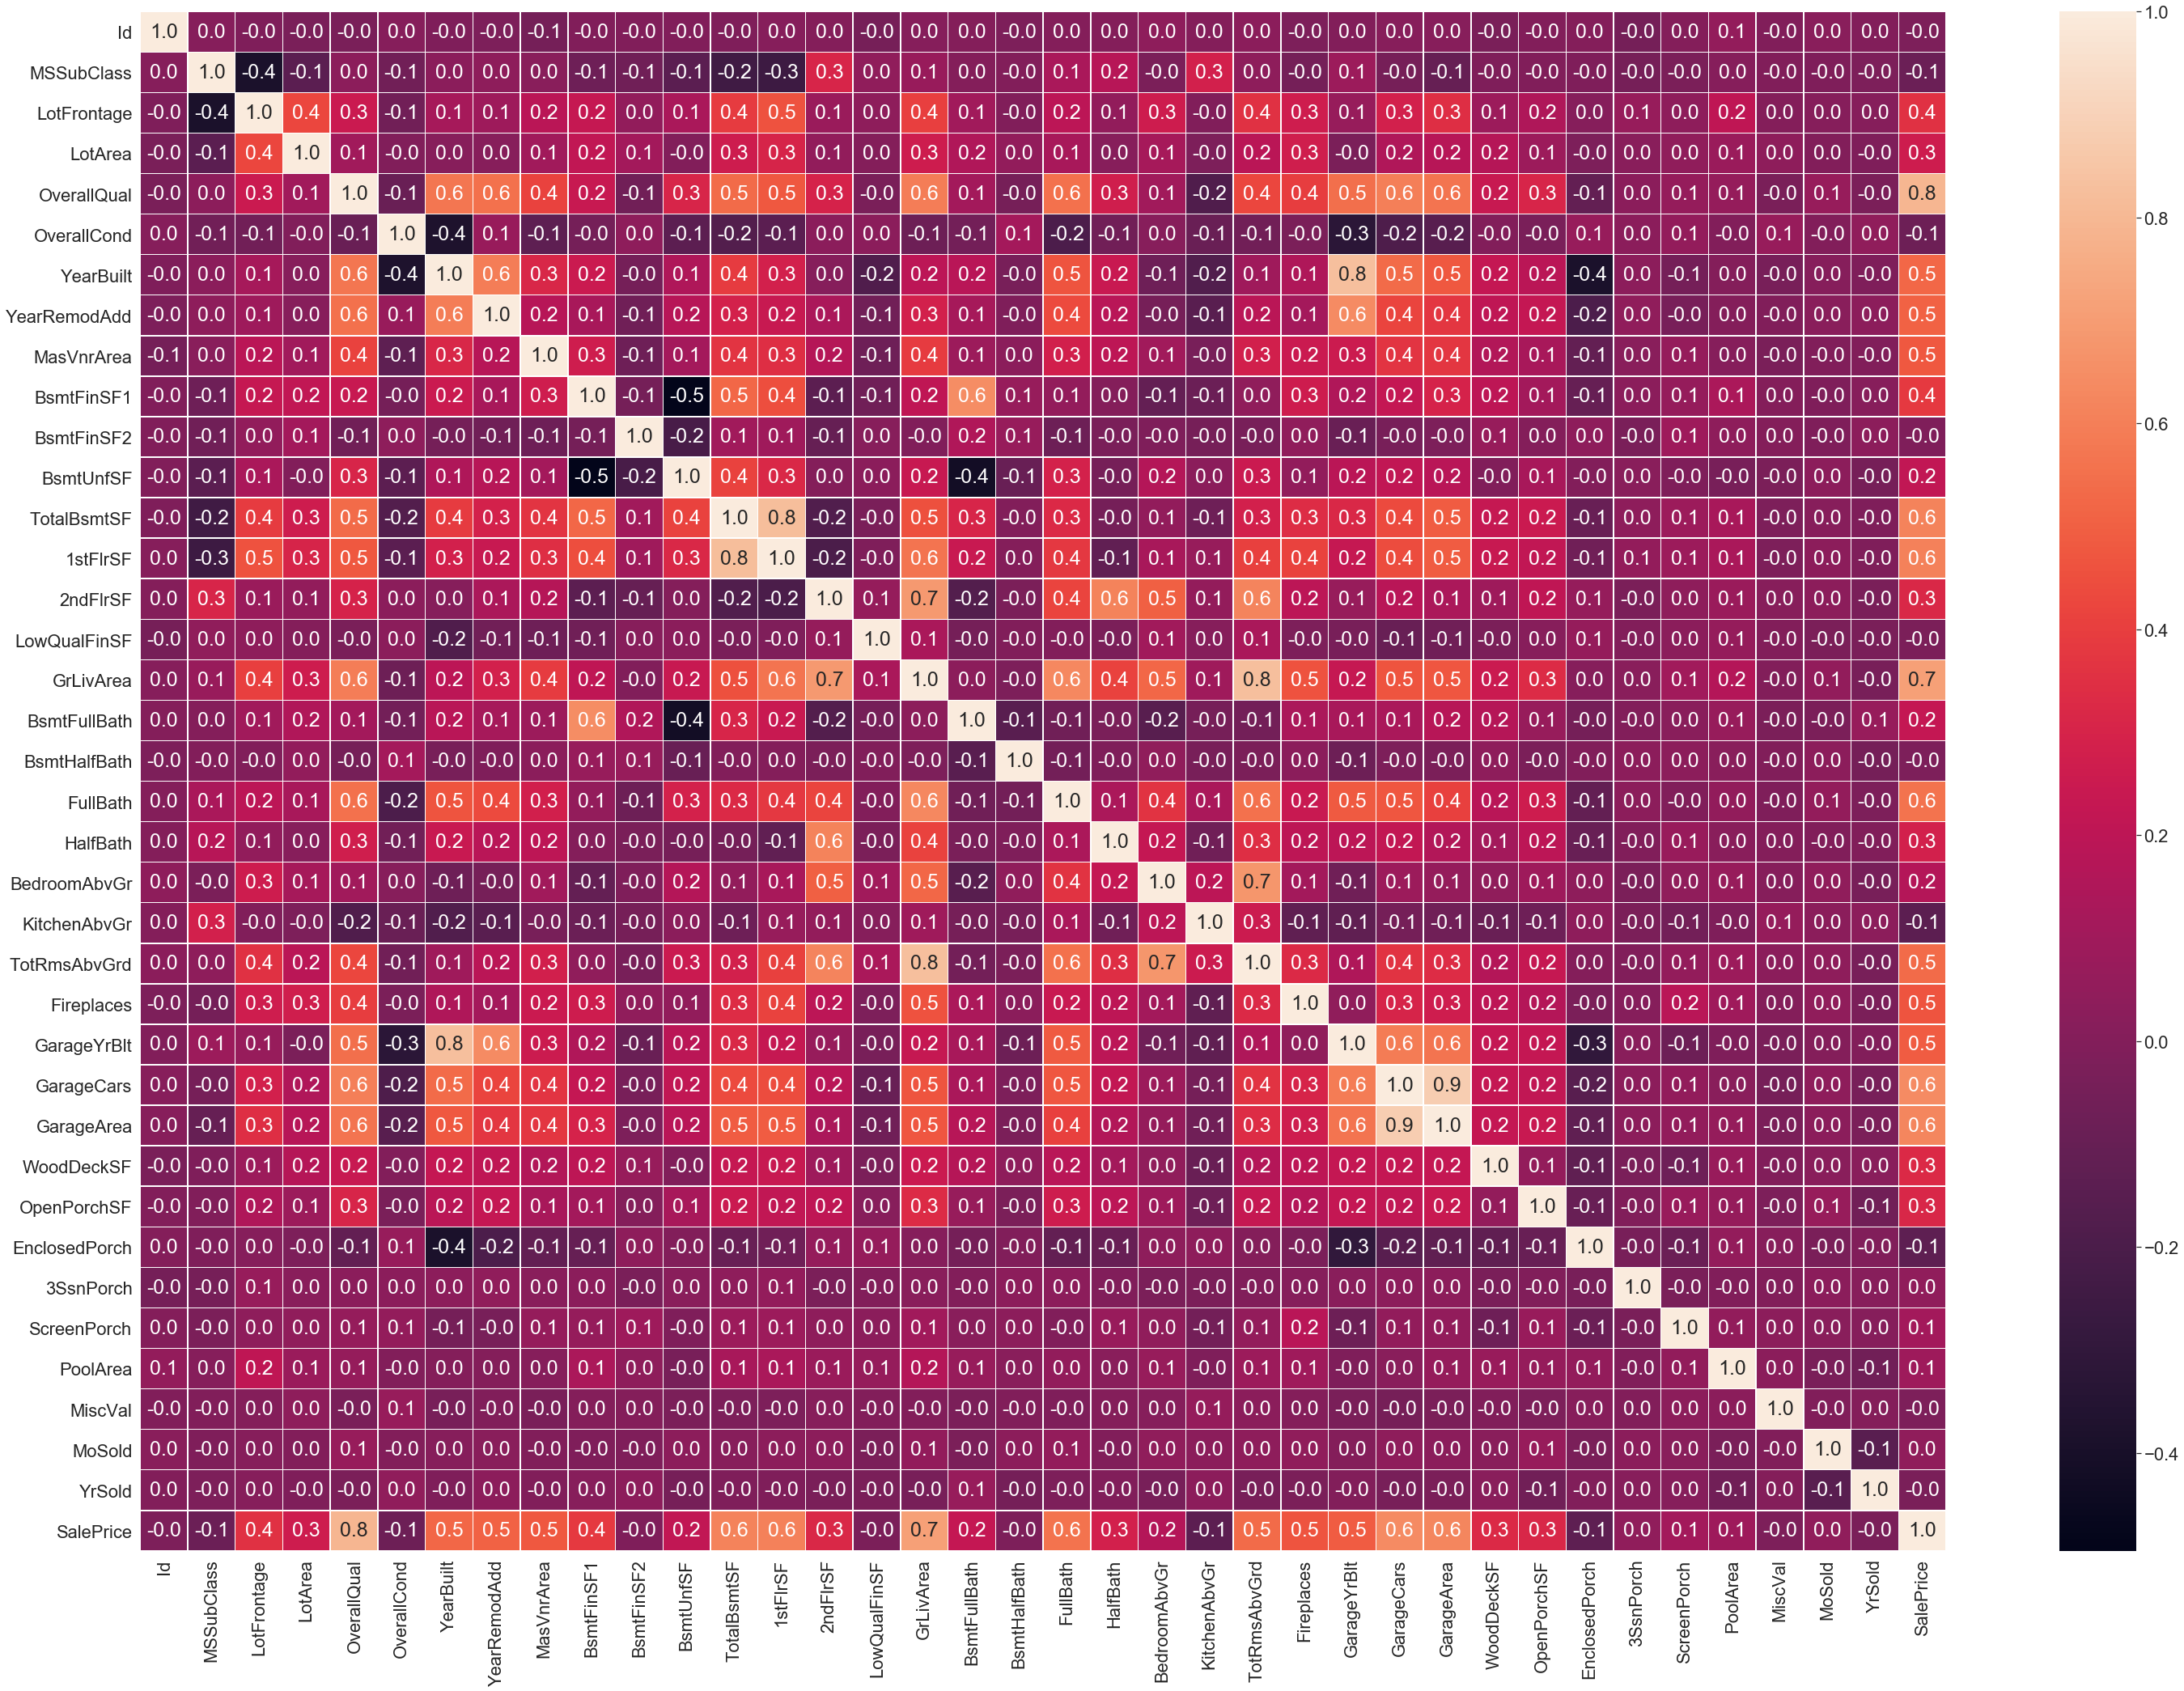

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

corr_train = train.corr()
sb.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sb.heatmap(corr_train, annot=True, annot_kws={"size":25}, fmt='.1f', linewidths=.5)


In [24]:
corr_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
corr_dict = corr_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns = []
for key, value in corr_dict.items():
    if ((value > 0.1) & (value < 0.8)) | (value <=-0.1):
        important_columns.append(key)
print(important_columns)

['1stFlrSF', 'FullBath', 'OpenPorchSF', 'TotRmsAbvGrd', 'GrLivArea', 'BsmtUnfSF', 'BedroomAbvGr', 'BsmtFinSF1', 'MasVnrArea', 'HalfBath', 'BsmtFullBath', 'ScreenPorch', 'GarageArea', 'YearBuilt', 'WoodDeckSF', 'EnclosedPorch', 'OverallQual', 'KitchenAbvGr', 'TotalBsmtSF', 'YearRemodAdd', 'LotArea', '2ndFlrSF', 'GarageYrBlt', 'GarageCars', 'Fireplaces', 'LotFrontage']


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

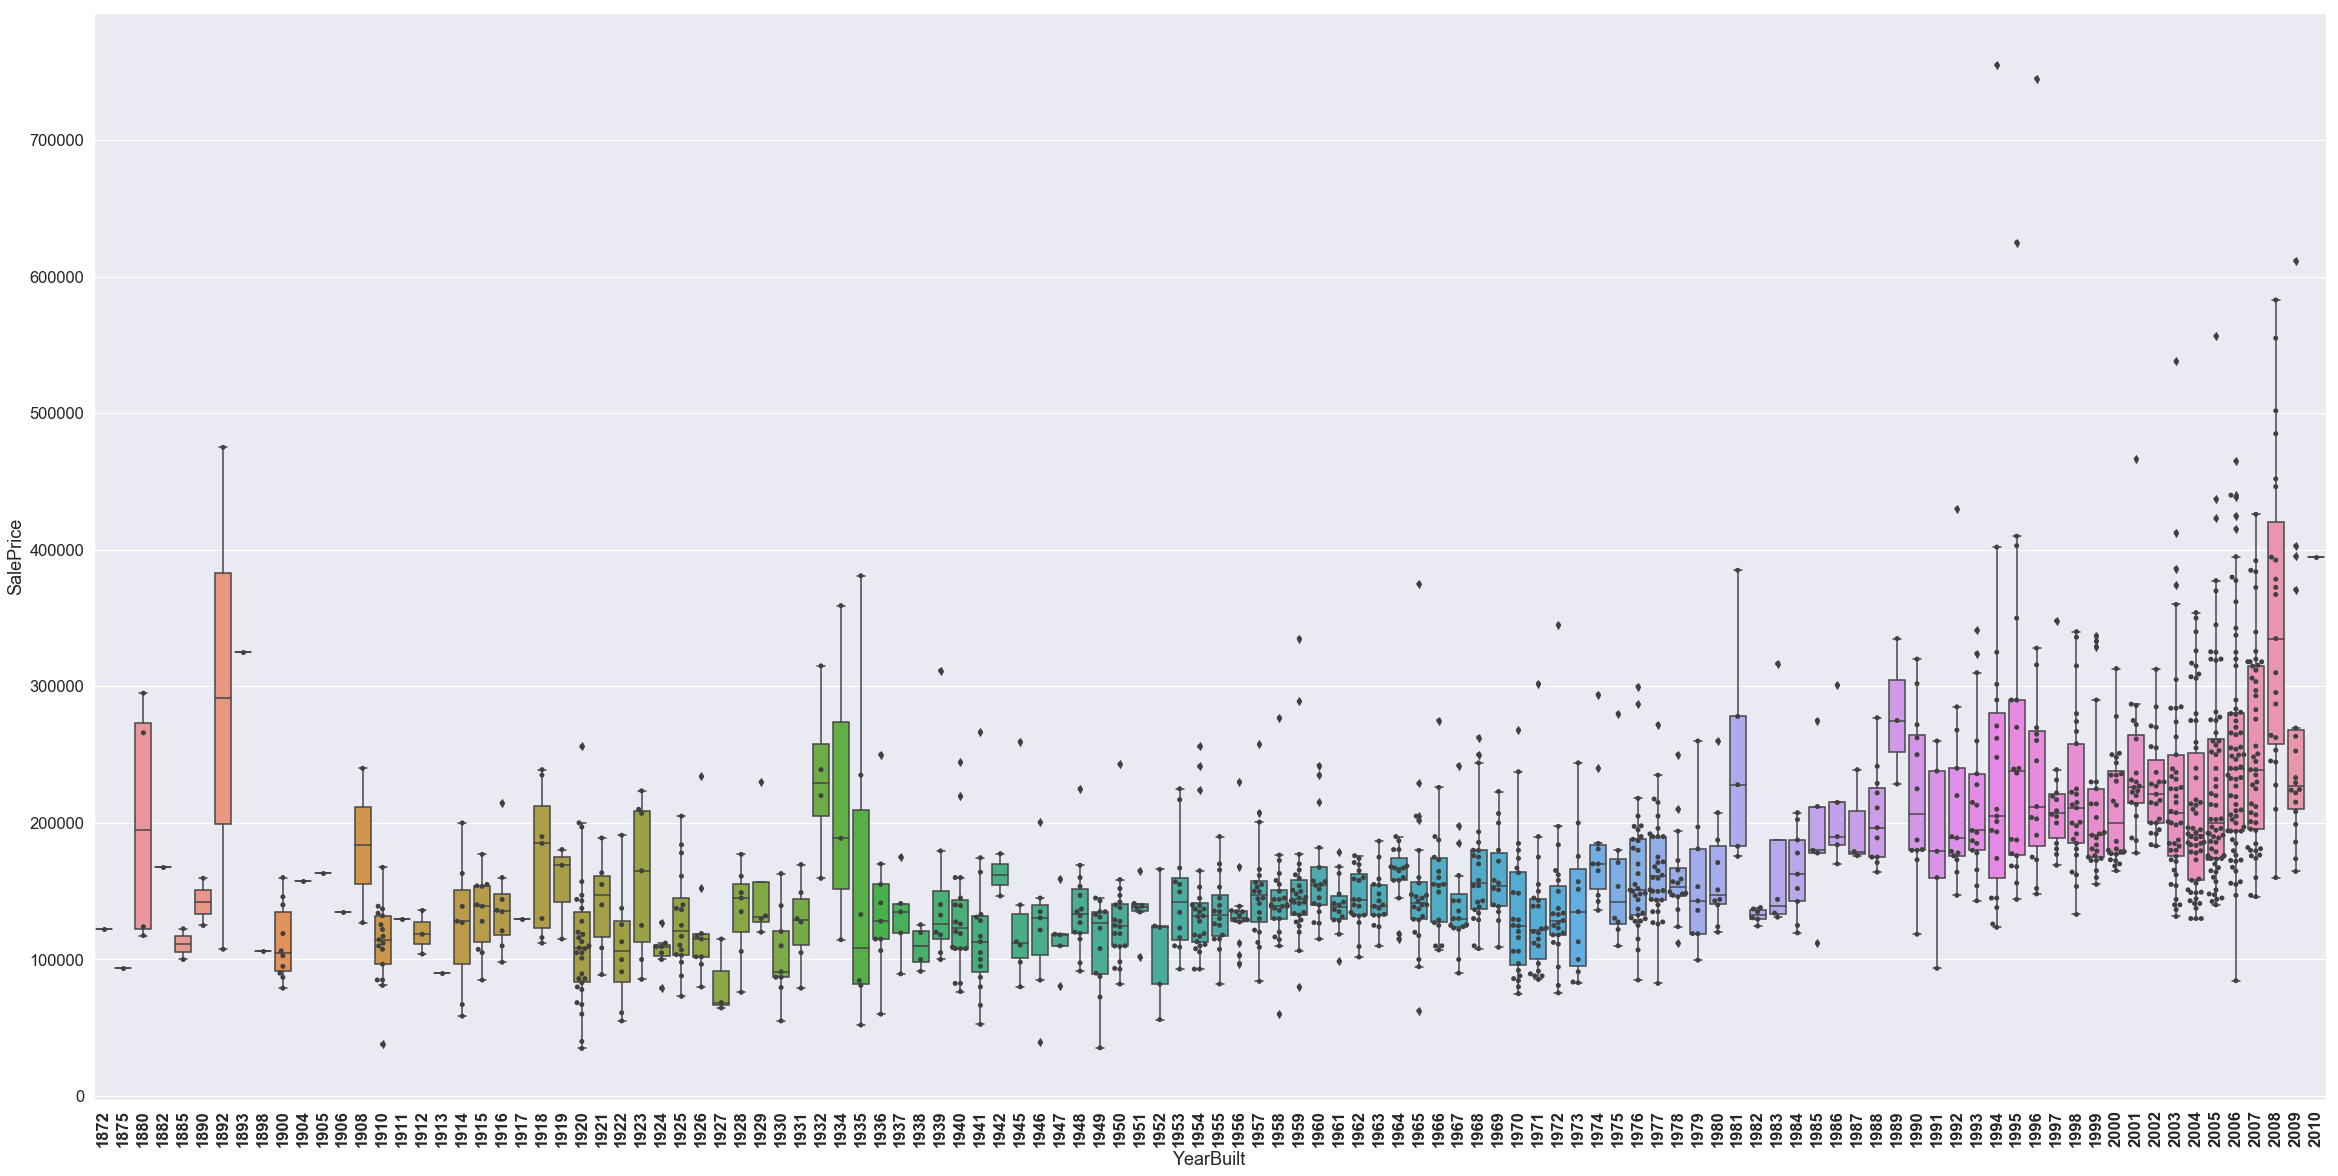

In [31]:
plt.figure(figsize=(40,20))
sb.set(font_scale=1.5)
sb.boxplot(x="YearBuilt", y="SalePrice", data=train)
sb.swarmplot(x="YearBuilt", y="SalePrice", data=train, color=".25")
plt.xticks(weight='bold', rotation=90)

In [32]:
train_test = pd.concat([train, test], axis=0, sort=False)
train_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [34]:
pd.set_option('display.max_rows', 5000)
train_test_null_info = pd.DataFrame(train_test.isnull().sum(), columns=['Count of Nan'])
train_test_dtype_info = pd.DataFrame(train_test.dtypes, columns=['DataTypes'])
train_test_info = pd.concat([train_test_null_info, train_test_dtype_info], axis=1)
train_test_info

Count of Nan DataTypes
Id                        0     int64
MSSubClass                0     int64
MSZoning                  4    object
LotFrontage             486   float64
LotArea                   0     int64
Street                    0    object
Alley                  2721    object
LotShape                  0    object
LandContour               0    object
Utilities                 2    object
LotConfig                 0    object
LandSlope                 0    object
Neighborhood              0    object
Condition1                0    object
Condition2                0    object
BldgType                  0    object
HouseStyle                0    object
OverallQual               0     int64
OverallCond               0     int64
YearBuilt                 0     int64
YearRemodAdd              0     int64
RoofStyle                 0    object
RoofMatl                  0    object
Exterior1st               1    object
Exterior2nd               1    object
MasVnrType               24    object
MasVnrArea               23   float64
ExterQual                 0    object
ExterCond                 0    object
Foundation                0    object
BsmtQual                 81    object
BsmtCond                 82    object
BsmtExposure             82    object
BsmtFinType1             79    object
BsmtFinSF1                1   float64
BsmtFinType2             80    object
BsmtFinSF2                1   float64
BsmtUnfSF                 1   float64
TotalBsmtSF               1   float64
Heating                   0    object
HeatingQC                 0    object
CentralAir                0    object
Electrical                1    object
1stFlrSF                  0     int64
2ndFlrSF                  0     int64
LowQualFinSF              0     int64
GrLivArea                 0     int64
BsmtFullBath              2   float64
BsmtHalfBath              2   float64
FullBath                  0     int64
HalfBath                  0     int64
BedroomAbvGr              0     int64
KitchenAbvGr              0     int64
KitchenQual               1    object
TotRmsAbvGrd              0     int64
Functional                2    object
Fireplaces                0     int64
FireplaceQu            1420    object
GarageType              157    object
GarageYrBlt             159   float64
GarageFinish            159    object
GarageCars                1   float64
GarageArea                1   float64
GarageQual              159    object
GarageCond              159    object
PavedDrive                0    object
WoodDeckSF                0     int64
OpenPorchSF               0     int64
EnclosedPorch             0     int64
3SsnPorch                 0     int64
ScreenPorch               0     int64
PoolArea                  0     int64
PoolQC                 2909    object
Fence                  2348    object
MiscFeature            2814    object
MiscVal                   0     int64
MoSold                    0     int64
YrSold                    0     int64
SaleType                  1    object
SaleCondition             0    object
SalePrice              1459   float64

In [35]:
train_test.loc[train_test['Fireplaces'] == 0, 'FireplaceQu'] = 'Nothing'

In [38]:
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))

In [39]:
train_test['LotFrontage'].interpolate(method='linear', inplace=True)
train_test['LotFrontage'] = train_test['LotFrontage'].astype(int)

In [40]:
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)

In [41]:
train_test["Fence"] = train_test["Fence"].fillna("None")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")

In [42]:
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='TA'

In [43]:
train_test['YrBltRmd']=train_test['YearBuilt']+train_test['YearRemodAdd']
train_test['Total_Square_Feet'] = train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF']
train_test['Total_Bath'] = train_test['FullBath'] + 0.5 * train_test['HalfBath'] + train_test['BsmtFullBath'] + 0.5 * train_test['BsmtHalfBath']
train_test['Total_Porch_Area'] = train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF']

In [44]:
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

In [45]:
for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[str(i)].dtype):
            train_test[str(i)]=train_test[str(i)].fillna(method='ffill')

In [46]:
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'YrSold', 'MoSold', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

for col in columns:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [48]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
3SsnPorch            11.376065
LandSlope             4.975157
KitchenAbvGr          4.302254
EnclosedPorch         4.003891
ScreenPorch           3.946694
MasVnrArea            2.600375
OpenPorchSF           2.535114
WoodDeckSF            1.842433
LotFrontage           1.483631
1stFlrSF              1.469604
Total_Porch_Area      1.376649
GrLivArea             1.269358
2ndFlrSF              0.861675
TotRmsAbvGrd          0.758367
MSSubClass            0.738722
Fireplaces            0.733495
HalfBath              0.694566
OverallCond           0.570312
HeatingQC             0.486656
FireplaceQu           0.333787
BedroomAbvGr          0.326324
OverallQual           0.197110
MoSold                0.195884
FullBath              0.167606
YrSold                0.132399
Id                    0.000000
exists_fireplace     -0.054148
BsmtFinT

In [49]:
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

MiscVal             21.947195
PoolArea            16.898328
exists_pool         14.884318
LotArea             12.822431
LowQualFinSF        12.088761
3SsnPorch           11.376065
LandSlope            4.975157
KitchenAbvGr         4.302254
EnclosedPorch        4.003891
ScreenPorch          3.946694
MasVnrArea           2.600375
OpenPorchSF          2.535114
WoodDeckSF           1.842433
LotFrontage          1.483631
1stFlrSF             1.469604
Total_Porch_Area     1.376649
GrLivArea            1.269358
BsmtExposure        -1.176341
KitchenQual         -1.448023
ExterQual           -1.801409
Fence               -1.993777
ExterCond           -2.497719
PavedDrive          -2.979084
BsmtCond            -3.301446
BsmtFinType2        -3.412861
CentralAir          -3.459022
GarageQual          -3.919880
exists_garage       -3.941054
Functional          -4.055757
GarageCond          -5.147262
exists_bsmt         -5.828995
BsmtQual            -6.303596
Street             -15.500133
PoolQC    

In [50]:
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

MiscVal  PoolArea  exists_pool  LotArea  LowQualFinSF  3SsnPorch  \
0        0         0            0     8450             0          0   
1        0         0            0     9600             0          0   
2        0         0            0    11250             0          0   
3        0         0            0     9550             0          0   
4        0         0            0    14260             0          0   

   LandSlope  KitchenAbvGr  EnclosedPorch  ScreenPorch  ...  BsmtFinType2  \
0          0             1              0            0  ...             5   
1          0             1              0            0  ...             5   
2          0             1              0            0  ...             5   
3          0             1            272            0  ...             5   
4          0             1              0            0  ...             5   

   CentralAir  GarageQual  exists_garage  Functional  GarageCond  exists_bsmt  \
0           1           4              1           6           4            1   
1           1           4              1           6           4            1   
2           1           4              1           6           4            1   
3           1           4              1           6           4            1   
4           1           4              1           6           4            1   

   BsmtQual  Street  PoolQC  
0         3       1       3  
1         3       1       3  
2         3       1       3  
3         3       1       3  
4         3       1       3  

[5 rows x 34 columns]

In [51]:
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

MiscVal  PoolArea  exists_pool    LotArea  LowQualFinSF  3SsnPorch  \
0      0.0       0.0          0.0  13.424522           0.0        0.0   
1      0.0       0.0          0.0  13.694528           0.0        0.0   
2      0.0       0.0          0.0  14.034135           0.0        0.0   
3      0.0       0.0          0.0  13.683422           0.0        0.0   
4      0.0       0.0          0.0  14.550144           0.0        0.0   

   LandSlope  KitchenAbvGr  EnclosedPorch  ScreenPorch  ...  BsmtFinType2  \
0        0.0       0.75096       0.000000          0.0  ...   1444.251693   
1        0.0       0.75096       0.000000          0.0  ...   1444.251693   
2        0.0       0.75096       0.000000          0.0  ...   1444.251693   
3        0.0       0.75096      16.012023          0.0  ...   1444.251693   
4        0.0       0.75096       0.000000          0.0  ...   1444.251693   

   CentralAir  GarageQual  exists_garage  Functional   GarageCond  \
0   46.910889   23.441187       1.502013      30.831  2952.403348   
1   46.910889   23.441187       1.502013      30.831  2952.403348   
2   46.910889   23.441187       1.502013      30.831  2952.403348   
3   46.910889   23.441187       1.502013      30.831  2952.403348   
4   46.910889   23.441187       1.502013      30.831  2952.403348   

   exists_bsmt   BsmtQual    Street       PoolQC  
0      4.73925  54.556498  5.271674  3975.420489  
1      4.73925  54.556498  5.271674  3975.420489  
2      4.73925  54.556498  5.271674  3975.420489  
3      4.73925  54.556498  5.271674  3975.420489  
4      4.73925  54.556498  5.271674  3975.420489  

[5 rows x 34 columns]

In [52]:
train_test=pd.get_dummies(train_test,dtype='int8')

In [53]:
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_test_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info

Count of NaN DataTypes
Id                                0     int64
MSSubClass                        0     int64
LotFrontage                       0   float64
LotArea                           0   float64
Street                            0   float64
Alley                             0     int64
LotShape                          0     int64
LandSlope                         0   float64
OverallQual                       0     int64
OverallCond                       0     int64
YearBuilt                         0     int64
YearRemodAdd                      0     int64
MasVnrArea                        0   float64
ExterQual                         0   float64
ExterCond                         0   float64
BsmtQual                          0   float64
BsmtCond                          0   float64
BsmtExposure                      0   float64
BsmtFinType1                      0     int64
BsmtFinSF1                        1   float64
BsmtFinType2                      0   float64
BsmtFinSF2                        1   float64
BsmtUnfSF                         1   float64
TotalBsmtSF                       1   float64
HeatingQC                         0     int64
CentralAir                        0   float64
1stFlrSF                          0   float64
2ndFlrSF                          0     int64
LowQualFinSF                      0   float64
GrLivArea                         0   float64
BsmtFullBath                      2   float64
BsmtHalfBath                      2   float64
FullBath                          0     int64
HalfBath                          0     int64
BedroomAbvGr                      0     int64
KitchenAbvGr                      0   float64
KitchenQual                       0   float64
TotRmsAbvGrd                      0     int64
Functional                        0   float64
Fireplaces                        0     int64
FireplaceQu                       0     int64
GarageYrBlt                     159   float64
GarageFinish                      0     int64
GarageCars                        1   float64
GarageArea                        1   float64
GarageQual                        0   float64
GarageCond                        0   float64
PavedDrive                        0   float64
WoodDeckSF                        0   float64
OpenPorchSF                       0   float64
EnclosedPorch                     0   float64
3SsnPorch                         0   float64
ScreenPorch                       0   float64
PoolArea                          0   float64
PoolQC                            0   float64
Fence                             0   float64
MiscVal                           0   float64
MoSold                            0     int64
YrSold                            0     int64
SalePrice                      1459   float64
YrBltRmd                          0     int64
Total_Square_Feet                 1   float64
Total_Bath                        2   float64
Total_Porch_Area                  0   float64
exists_pool                       0   float64
exists_garage                     0   float64
exists_fireplace                  0     int64
exists_bsmt                       0   float64
old_house                         0     int64
MSZoning_C (all)                  0      int8
MSZoning_FV                       0      int8
MSZoning_RH                       0      int8
MSZoning_RL                       0      int8
MSZoning_RM                       0      int8
LandContour_Bnk                   0      int8
LandContour_HLS                   0      int8
LandContour_Low                   0      int8
LandContour_Lvl                   0      int8
Utilities_AllPub                  0      int8
Utilities_NoSeWa                  0      int8
LotConfig_Corner                  0      int8
LotConfig_CulDSac                 0      int8
LotConfig_FR2                     0      int8
LotConfig_FR3                     0      int8
LotConfig_Inside                  0      int8
Neighborhood_Blmngtn              0      int8
Neighborhood_Blueste 

In [54]:
train=train_test[:1460]
test=train_test[1460:]

In [58]:
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

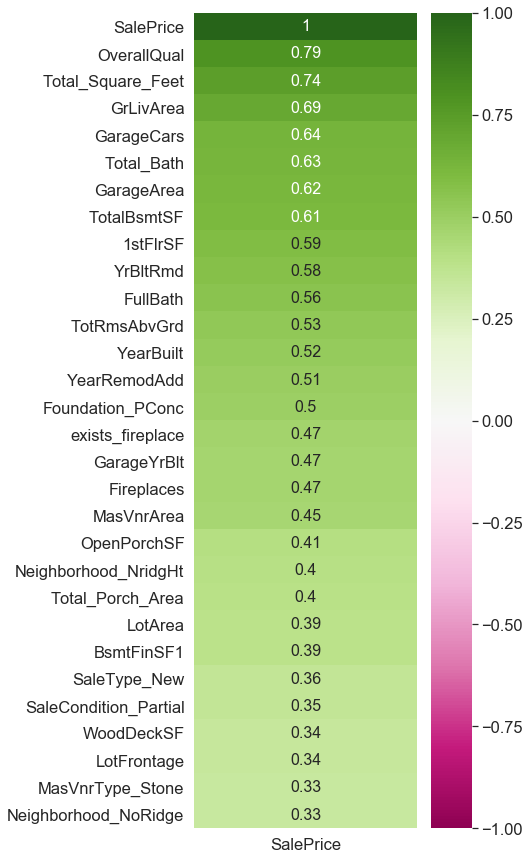

In [63]:
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [64]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'1stFlrSF': 0.5885261462134714,
 '2ndFlrSF': 0.31933380283206614,
 '3SsnPorch': 0.047431596976172344,
 'Alley': 0.08312112052038152,
 'BedroomAbvGr': 0.1682131543007415,
 'BldgType_1Fam': 0.13748324869515327,
 'BldgType_2fmCon': -0.09734830194128331,
 'BldgType_Duplex': -0.114654830022284,
 'BldgType_Twnhs': -0.09873019861048951,
 'BldgType_TwnhsE': 0.0038043834533088893,
 'BsmtCond': 0.05759519419685751,
 'BsmtExposure': -0.29723736662303957,
 'BsmtFinSF1': 0.38641980624215627,
 'BsmtFinSF2': -0.011378121450215216,
 'BsmtFinType1': -0.09210633107556564,
 'BsmtFinType2': 0.05726980114785624,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtHalfBath': -0.016844154297359294,
 'BsmtQual': -0.0534970338110994,
 'BsmtUnfSF': 0.214479105546969,
 'CentralAir': 0.25132816384015305,
 'Condition1_Artery': -0.10640071096805158,
 'Condition1_Feedr': -0.11732867748568224,
 'Condition1_Norm': 0.11296832108736438,
 'Condition1_PosA': 0.0420168990854169,
 'Condition1_PosN': 0.04954116844794432,
 'Conditio

In [65]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.3175) & (value<0.9)) | (value<=-0.315):
        best_columns.append(key)
best_columns

['OpenPorchSF',
 'TotalBsmtSF',
 'YrBltRmd',
 '2ndFlrSF',
 'FullBath',
 'KitchenQual',
 'HeatingQC',
 'Total_Square_Feet',
 'YearRemodAdd',
 '1stFlrSF',
 'Foundation_PConc',
 'OverallQual',
 'LotFrontage',
 'BsmtFinSF1',
 'GarageType_Detchd',
 'GarageArea',
 'YearBuilt',
 'MasVnrType_Stone',
 'LotArea',
 'Total_Porch_Area',
 'GarageYrBlt',
 'GrLivArea',
 'exists_fireplace',
 'GarageCars',
 'Total_Bath',
 'Neighborhood_NridgHt',
 'SaleCondition_Partial',
 'old_house',
 'Fireplaces',
 'Foundation_CBlock',
 'MasVnrArea',
 'TotRmsAbvGrd',
 'SaleType_New',
 'WoodDeckSF',
 'MasVnrType_None',
 'GarageFinish',
 'ExterQual',
 'Neighborhood_NoRidge']

In [66]:
print(len(best_columns))

38


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]), <a list of 38 Text xticklabel objects>)

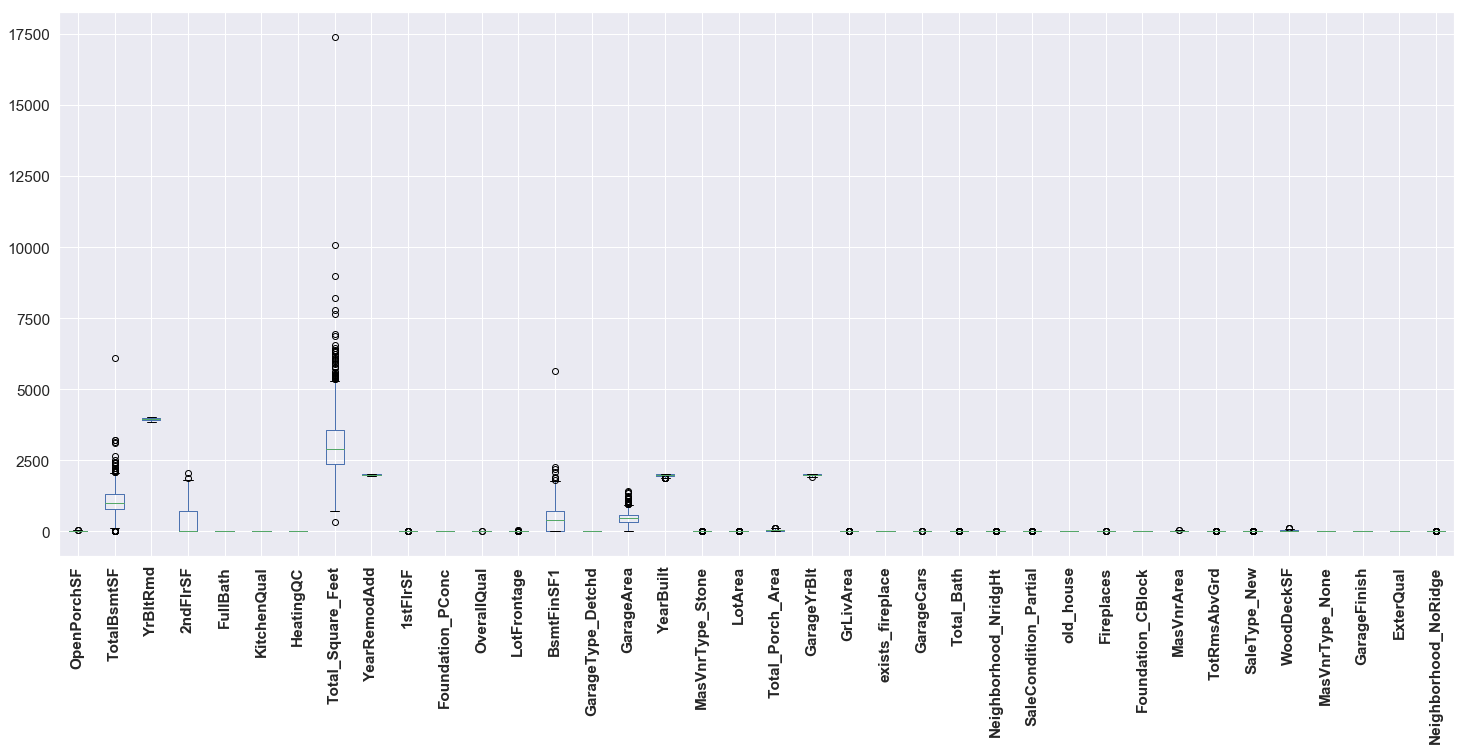

In [67]:
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

In [68]:
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

In [69]:
print(min(train['SalePrice_Log1p']))
print(max(train['SalePrice_Log1p']))

10.460270761075149
13.534474352733596


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


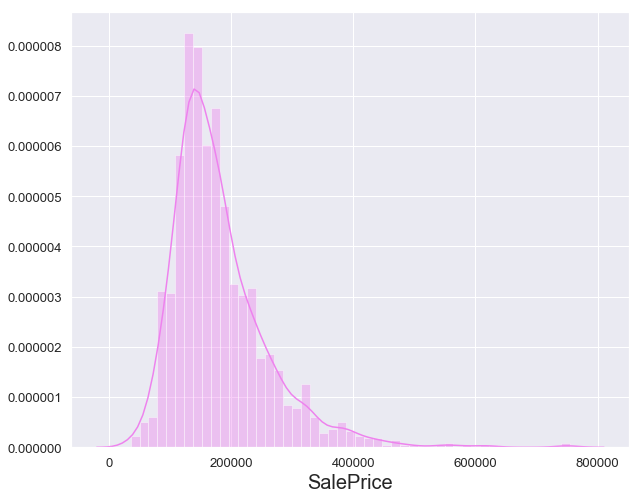

In [70]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice'],color='violet')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',train['SalePrice'].skew())
print('Kurtosis Dist:',train['SalePrice'].kurt())

Skew Dist: 0.12134661989685333
Kurtosis Dist: 0.809519155707878


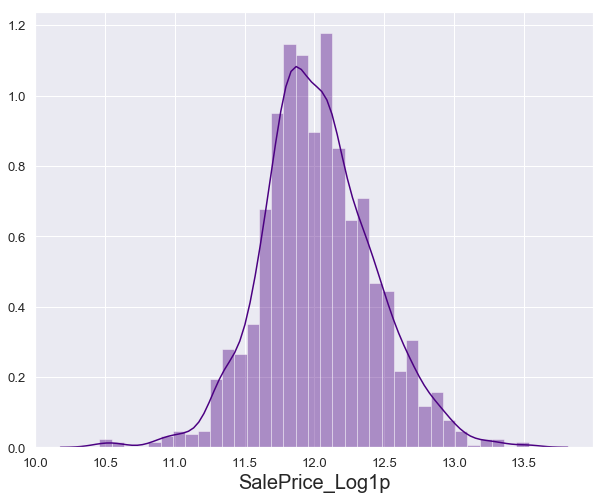

In [71]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice_Log1p'],color='indigo')
plt.xlabel('SalePrice_Log1p',fontsize=20)
print('Skew Dist:',train['SalePrice_Log1p'].skew())
print('Kurtosis Dist:',train['SalePrice_Log1p'].kurt())

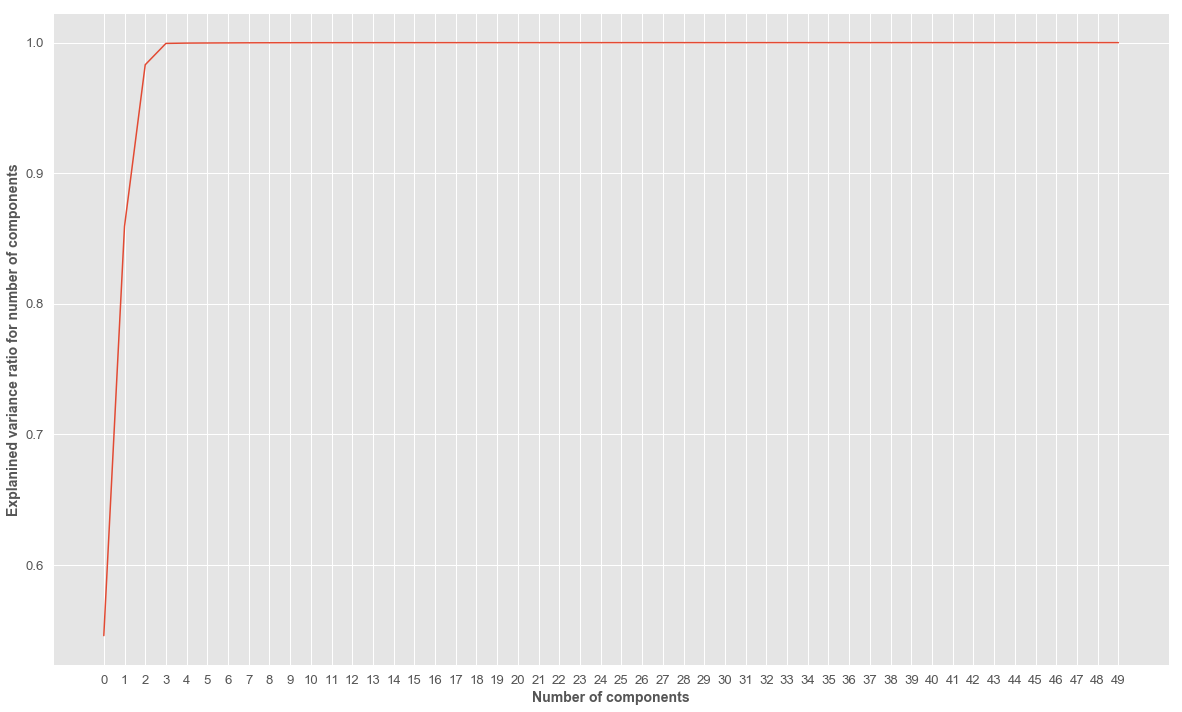

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(train)

pca=PCA(50).fit(train_rbst)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

train_pca=PCA(3).fit_transform(train_rbst)

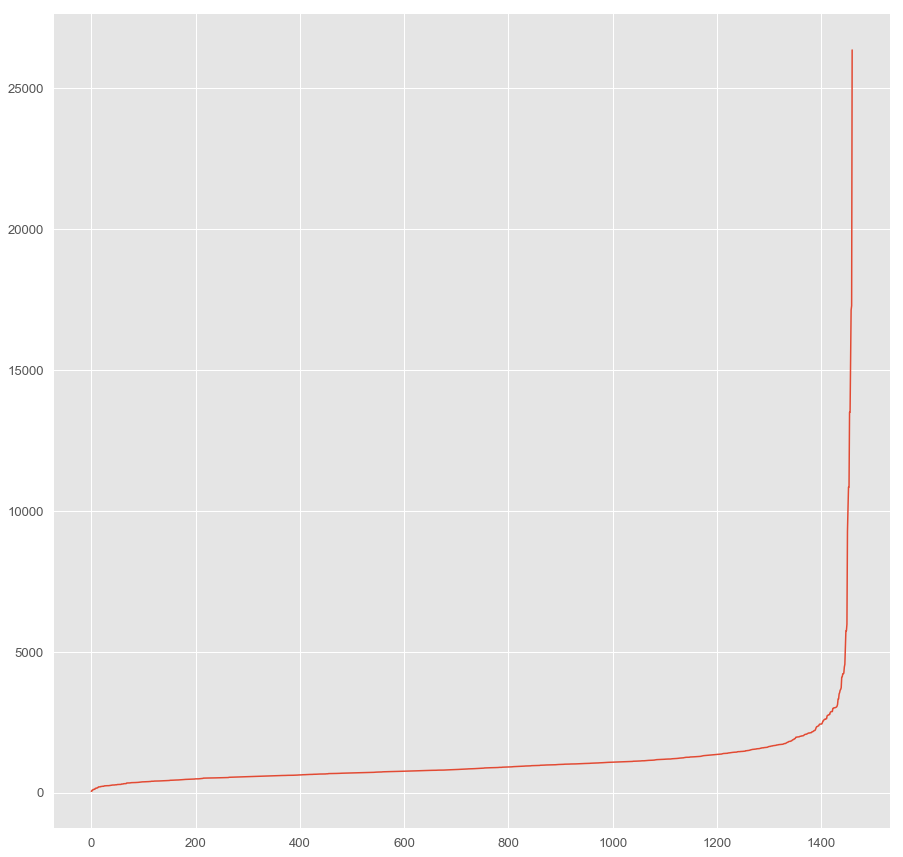

In [73]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,15))
plt.plot(distances)

In [74]:
dbscan = DBSCAN(eps=1400, min_samples=20).fit(train_pca)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

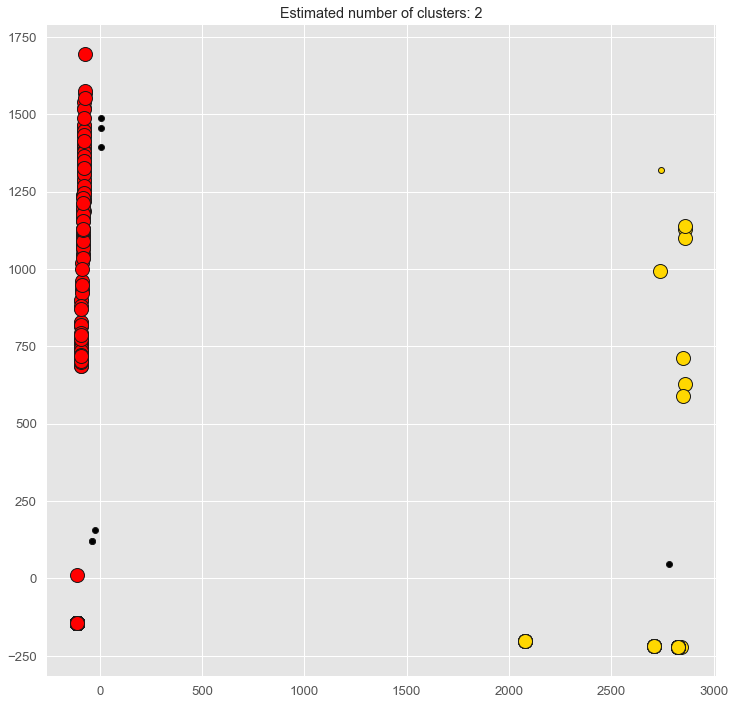

In [75]:
unique_labels = set(labels)
plt.figure(figsize=(12,12))
colors = [plt.cm.prism(each)  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = train_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [76]:
labels=pd.DataFrame(labels,columns=['Classes'])
print(labels[labels['Classes']==-1])

      Classes
197        -1
810        -1
1170       -1
1182       -1
1298       -1
1386       -1
1423       -1


In [77]:
train=pd.concat([train,labels],axis=1)

In [78]:
train[train.Classes==-1]

Id  MSSubClass  LotFrontage    LotArea    Street  Alley  LotShape  \
197    198           7    23.181519  15.851263  5.271674      1         3   
810    811           0    15.102190  13.811205  5.271674      1         3   
1170  1171           8    14.890046  13.755758  5.271674      1         3   
1182  1183           5    22.181021  14.751523  5.271674      1         0   
1298  1299           5    31.456866  18.058233  5.271674      1         2   
1386  1387           5    15.311586  14.898481  5.271674      1         0   
1423  1424           8    14.457069  15.268763  5.271674      1         0   

      LandSlope  OverallQual  OverallCond  ...  SaleType_Oth  SaleType_WD  \
197         0.0            8            3  ...             0            1   
810         0.0            6            5  ...             0            1   
1170        0.0            6            5  ...             0            1   
1182        0.0           10            4  ...             0            1   
1298        0.0           10            4  ...             0            0   
1386        0.0            7            4  ...             0            1   
1423        0.0            6            6  ...             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
197                       1                      0                     0   
810                       0                      0                     0   
1170                      0                      0                     0   
1182                      1                      0                     0   
1298                      0                      0                     0   
1386                      0                      0                     0   
1423                      0                      0                     1   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
197                      0                     0                      0   
810                      0                     1                      0   
1170                     0                     1                      0   
1182                     0                     0                      0   
1298                     0                     0                      1   
1386                     0                     1                      0   
1423                     0                     0                      0   

      SalePrice_Log1p  Classes  
197         12.367345       -1  
810         12.106258       -1  
1170        12.049425       -1  
1182        13.521141       -1  
1298        11.982935       -1  
1386        12.429220       -1  
1423        12.524421       -1  

[7 rows x 234 columns]

In [79]:
train.drop([197,810,1170,1182,1298,1386,1423],axis=0,inplace=True)

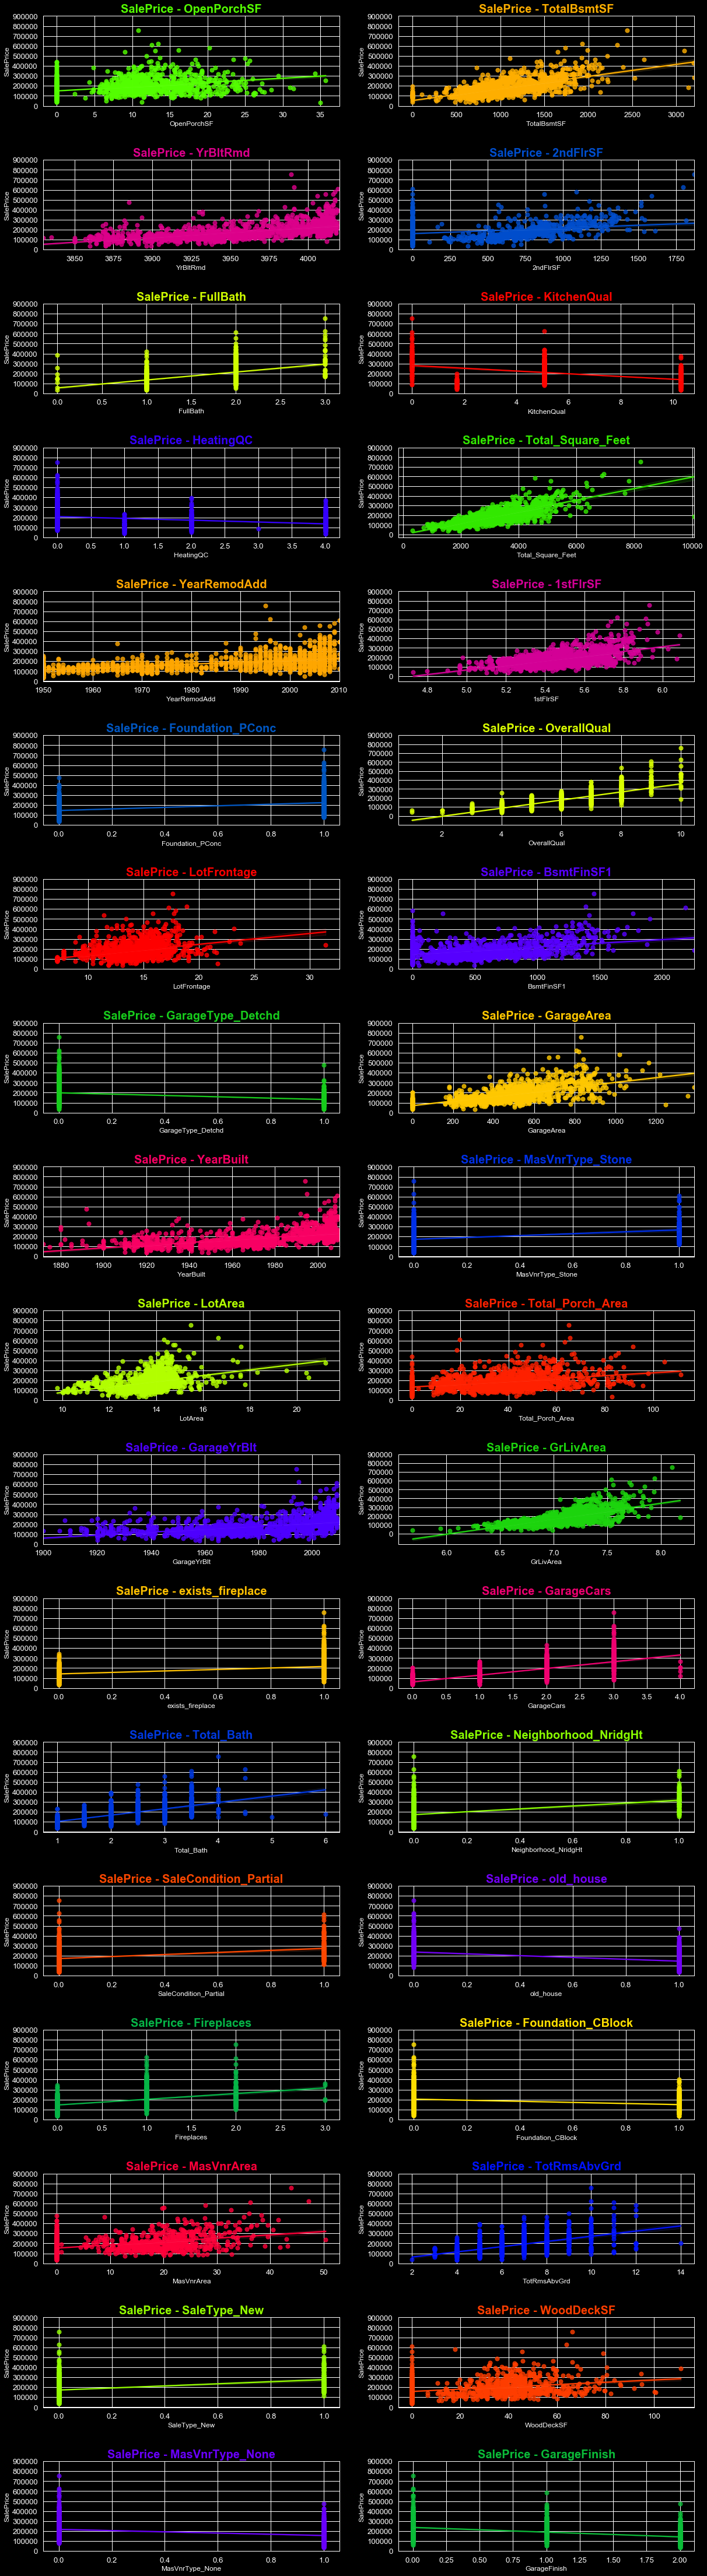

In [80]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)

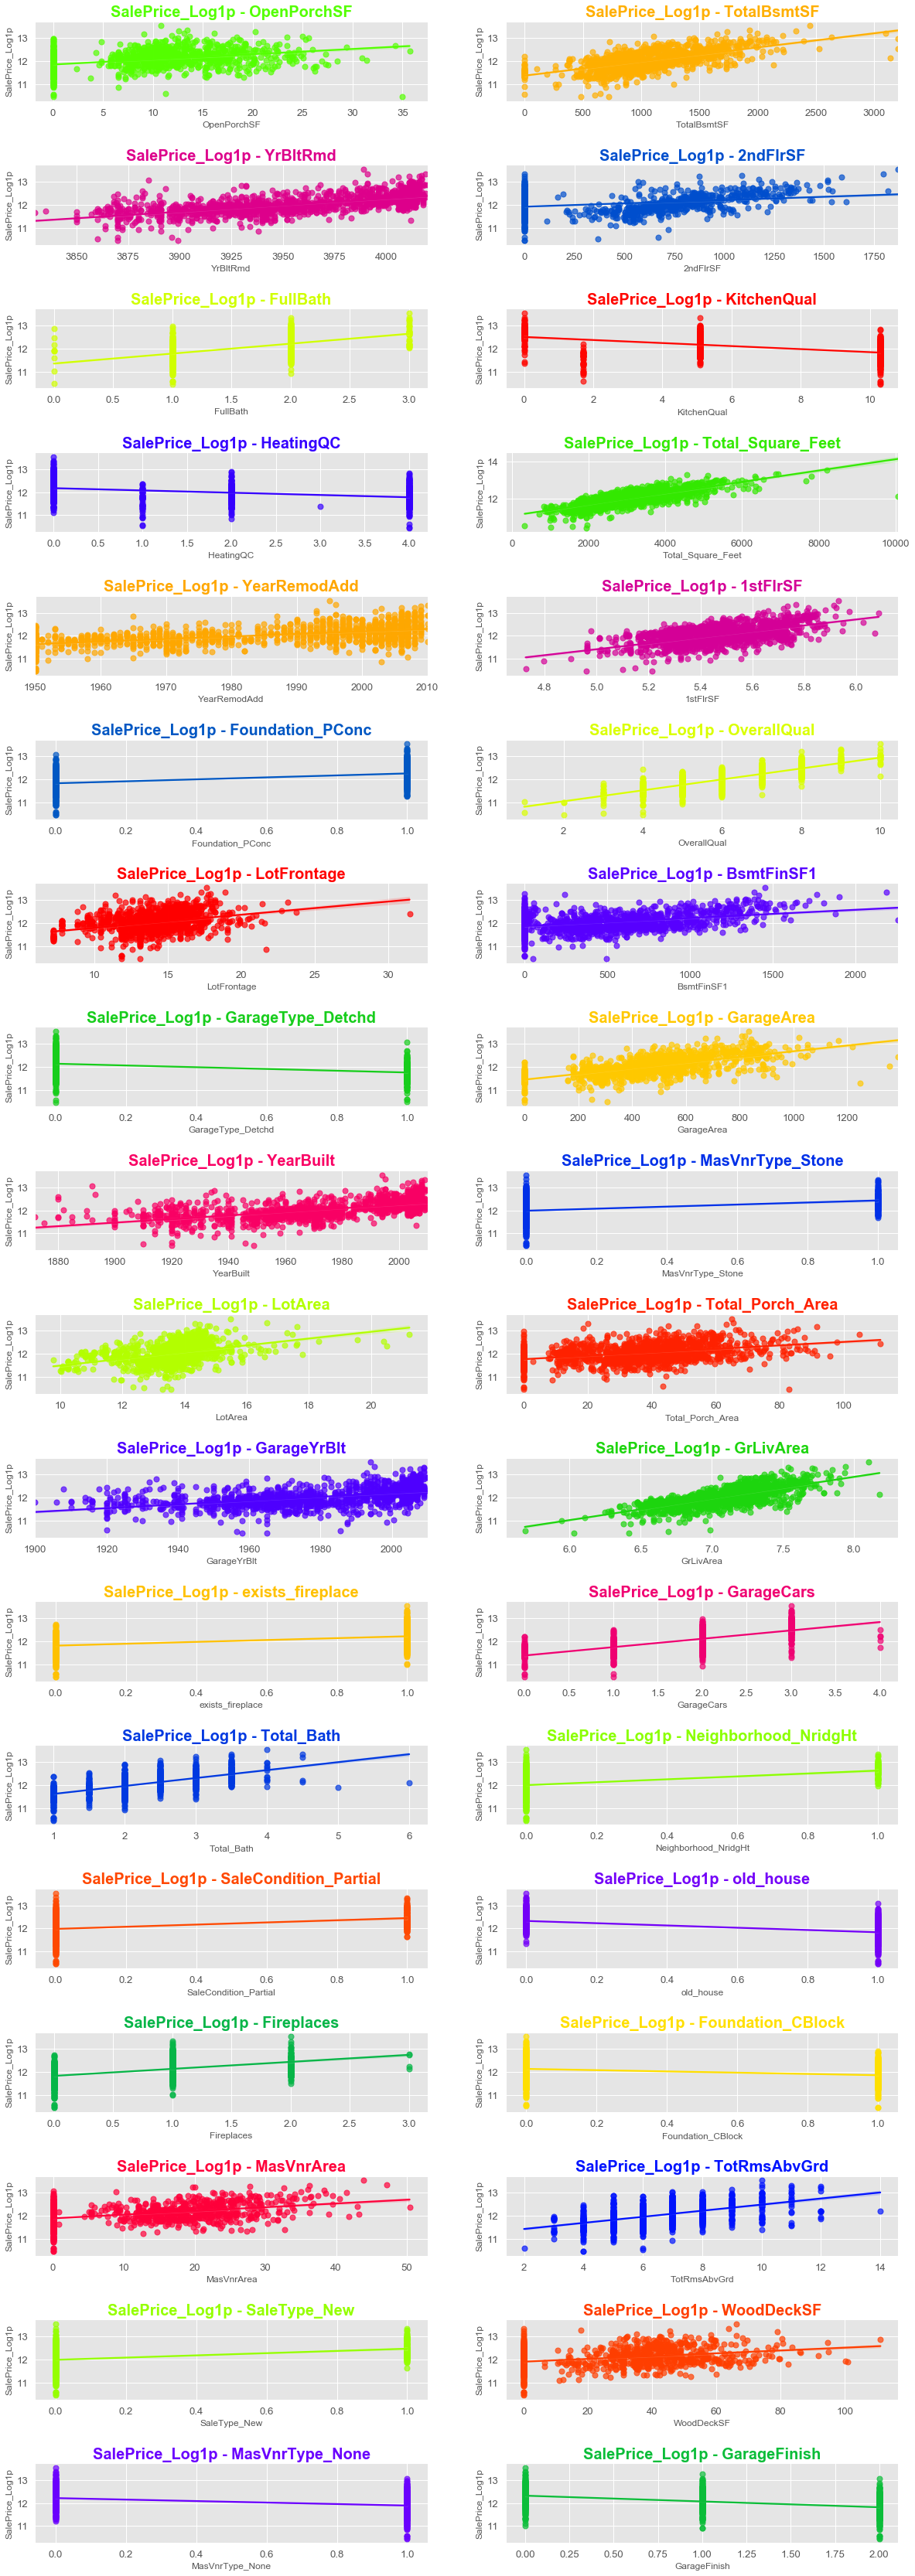

In [81]:
plt.style.use('ggplot')
fig, axes = plt.subplots(18, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sb.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice_Log1p',fontsize=12)
    ax.set_title('SalePrice_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)

In [83]:
train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==10) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.Total_Square_Feet>=10000) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.Total_Square_Feet<3000) & (train.SalePrice>375000)].index)
train = train.drop(train[(train.GrLivArea>4500) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea<3000) & (train.SalePrice>575000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.Total_Bath.isin([5,6])) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.Total_Porch_Area>600) & (train.SalePrice<50000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.GarageFinish.isin([1,2])) & (train.SalePrice>470000)].index)
train = train.drop(train[(train.old_house==0) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.old_house==1) & (train.SalePrice>400000)].index)
train = train.drop(train[(train.KitchenQual==2) & (train.SalePrice>600000)].index)
train = train.drop(train[(train.KitchenQual==3) & (train.SalePrice>360000)].index)
train = train.drop(train[(train.ExterQual==2) & (train.SalePrice>550000)].index)


train = train[train.GarageArea * train.GarageCars < 3700]
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

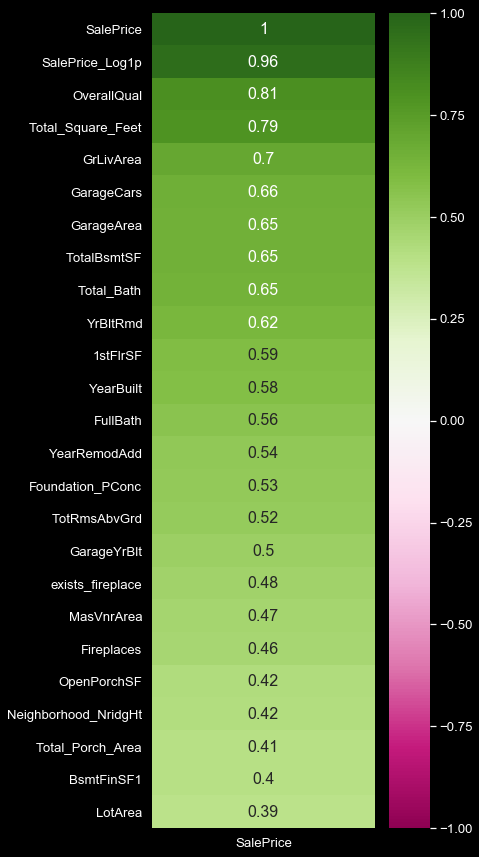

In [86]:
plt.style.use('dark_background')
corr1_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [87]:
train.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
T

In [88]:
test.isnull().sum()

Id                          0
MSSubClass                  0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandSlope                   0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath  

In [89]:
del test['SalePrice']

In [91]:
X_train = train.drop(['SalePrice','SalePrice_Log1p','Classes'],axis=1)
y_train = train.SalePrice_Log1p

In [93]:
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit
overfitted_features = overfit_reducer(X_train)

In [94]:
print(X_train.shape)
print(test.shape)

(1433, 231)
(1459, 231)


In [95]:
X.drop(overfitted_features,axis=1,inplace=True)
test.drop(overfitted_features,axis=1,inplace=True)
print('X.shape',X.shape)
print('test.shape',test.shape)

X.shape (1433, 210)
test.shape (1459, 210)


In [96]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.002,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1430, 210)
X_test Shape : (3, 210)
y_train Shape : (1430,)
y_test Shape : (3,)


In [99]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.8182805256013467
Mean Absolute Error Accuracy:  0.05347361266666736
Mean Squared Error Accuracy:  0.003356943351953142


In [100]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RidgeCV----------
R square Accuracy:  0.021100390845290806
Mean Absolute Error Accuracy:  0.117212664619462
Mean Squared Error Accuracy:  0.018083425268842743


In [101]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LassoCV----------
R square Accuracy:  0.021549378485515636
Mean Absolute Error Accuracy:  0.11716261320738457
Mean Squared Error Accuracy:  0.018075131022565895


In [102]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------ElasticNetCV----------
R square Accuracy:  0.06931811449197689
Mean Absolute Error Accuracy:  0.11628300243713537
Mean Squared Error Accuracy:  0.017192688778559034


In [104]:
estimators = [('gbr', gb_reg),   
              ('lasso', lassocv_reg),   
              ('ridge', ridgecv_reg),   
              ('elasticnet', elasticv_reg)]

stack_reg=StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=50),n_jobs=-1)
stack_reg.fit(X_train, y_train)
y_head=stack_reg.predict(X_test)
print('-'*10+'StackingRegressor'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------StackingRegressor----------
R square Accuracy:  0.6845836441185781
Mean Absolute Error Accuracy:  0.06408162263313481
Mean Squared Error Accuracy:  0.005826754906029335


In [105]:
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

SalePrice_Log1p    Predict
0        11.976666  12.083567
1        11.763692  11.686302
2        12.091789  12.099743

In [106]:
print('Count columns of test: ',len(test.columns))
print('Count columns of X: ',len(X.columns))

Count columns of test:  210
Count columns of X:  210


In [108]:
test_pred_gb=gb_reg.predict(test_pwr)

In [110]:
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])

In [111]:
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))

In [114]:
test_pred_gb.head()

SalePrice
0   129534.0
1   164157.0
2   192591.0
3   204622.0
4   185730.0

In [116]:
sample['SalePrice']=test_pred_gb

In [117]:
sample.head()

Id  SalePrice
0  1461   129534.0
1  1462   164157.0
2  1463   192591.0
3  1464   204622.0
4  1465   185730.0

In [118]:
sample.to_csv("sample_submission.csv", index=False)